In [1]:
# libs
import pickle
import umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from classificator import Classificator

# utility methods

In [2]:
def load_pckl(fname):
    with open(fname, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pckl(d, fname):
    with open(fname, 'wb') as f:
        pickle.dump(d, f, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
def collected_inner_to_dict(d, idxs, tgt_dict, lvl, key_level):
    if lvl == key_level:
        for lvl_i, idx in zip(range(key_level), idxs):
            tgt_dict[f'idx_{lvl_i}'].append(idx)
        
        for k, v in d.items():
            tgt_dict[k].append(v)
    else:
        for d_k, d_v in d.items():
            idxs_k = idxs + [d_k]
            lvl_k = lvl+1
            
            collected_inner_to_dict(d_v, idxs_k, tgt_dict, lvl_k, key_level)
            
def nested_dict_to_df(d, key_level, get_df=True):
    """
    key level - at whick dataframe keys will be. 0 is top
    """
    
    # get keys
    keys = []
    
    d_i = d
    for lvl in range(key_level):
        for k, d_in in d_i.items():
            d_i = d_in
            break
        keys.append(f'idx_{lvl}')
    keys.extend(list(d_i.keys()))
    
    print(keys)
    
    D = {k:[] for k in keys}
    
    idxs = []
    collected_inner_to_dict(d, idxs, D, 0, key_level)
    
    return pd.DataFrame(D) if get_df else D

# Read data & manual labels

In [4]:
stopped_tracks = load_pckl('stopped_tracks_29.07.2021.pckl')

In [5]:
stopped_tracks_g = nested_dict_to_df(stopped_tracks, 2, False)
stopped_tracks_df = nested_dict_to_df(stopped_tracks, 2)

['idx_0', 'idx_1', 'w_mean', 'w_med', 'wl1_o_wmean', 'wl1_o_wmed', 'wml5_o_wmean', 'wml5_o_wmed', 'c_mean', 'c_med', 'fdoc_mean_l5', 'c_l1', 'c_mean_l5']
['idx_0', 'idx_1', 'w_mean', 'w_med', 'wl1_o_wmean', 'wl1_o_wmed', 'wml5_o_wmean', 'wml5_o_wmed', 'c_mean', 'c_med', 'fdoc_mean_l5', 'c_l1', 'c_mean_l5']


In [6]:
vectorized = [v for k,v in stopped_tracks_g.items() if 'idx_' not in k]
vectorized = np.array(vectorized).T
print(vectorized.shape)

(2229, 11)


In [7]:
#classes:
c_unknown = 0

c_det = 1

c_diap = 2
c_p_diap = 3

c_crawl = 4

c_not_cell = 5
c_jumps = 6

man_labels = {
    103: {
        0: c_jumps,
        1: c_diap,
        2: c_not_cell,
        3: c_not_cell,
        4: c_not_cell,
        5: c_diap,
        6: c_diap,
        7: c_det,
        8: c_diap,
        9: c_not_cell,
        10: c_det,
        11: c_p_diap,
        12: c_diap,
        13: c_det,
        14: c_det,
        15: c_det,
        16: c_diap,
        17: c_diap,
        18: c_diap,
        19: c_diap,
        20: c_crawl,
        21: c_diap,
        22: c_det,
        23: c_diap,
        24: c_p_diap,
        25: c_p_diap,
        26: c_p_diap,
        27: c_diap,
        28: c_crawl,
        29: c_diap,
        30: c_det,
        31: c_diap,
        32: c_diap,
        33: c_det,
        34: c_det,
        35: c_unknown, # out of FoV
        36: c_det,
        37: c_det,
        38: c_diap,
        39: c_unknown, # stretch
        40: c_diap,
        41: c_det,
        42: c_det,
        43: c_diap,
        44: c_p_diap,
        45: c_diap,
        46: c_det,
        47: c_det,
        48: c_det,
        49: c_not_cell,
        50: c_unknown,
        51: c_unknown,
        52: c_diap,
        53: c_unknown,
        54: c_diap,
    },
    234: {
        0: c_det,
        1: c_det,
        2: c_crawl,
        3: c_crawl,
        4: c_det,
        5: c_not_cell,
        6: c_det,
        7: c_crawl,
        8: c_det,
        9: c_det,
        10: c_unknown, # dividing
        11: c_crawl,
        12: c_det,
        13: c_det,
        14: c_not_cell,
        15: c_det,
        16: c_det,
        17: c_det,
        18: c_det,
        19: c_det,
        20: c_det,
        21: c_det,
        22: c_crawl,
        23: c_det,
        24: c_det,
        25: c_diap,
        26: c_crawl,
        27: c_det,
        28: c_det,
        29: c_crawl,
        30: c_det,
        31: c_det,
        32: c_not_cell,
        33: c_det,
        34: c_det,
        35: c_det,
        36: c_crawl,
        37: c_det,
        38: c_not_cell,
        39: c_det,
        40: c_det,
        41: c_not_cell,
        42: c_not_cell,
        43: c_det,
        44: c_not_cell,
        45: c_det,
        46: c_det,
        47: c_det,
        48: c_det,
        49: c_det,
    },
    293:{
        0: c_not_cell,
        1: c_crawl,
        2: c_p_diap,
        3: c_diap,
        4: c_diap,
        5: c_diap,
        6: c_not_cell,
        7: c_unknown,
        8: c_crawl,
        9: c_det,
        10: c_diap,
        11: c_diap,
        12: c_det,
        13: c_det,
        14: c_crawl,
        15: c_not_cell,
        16: c_crawl,
        17: c_det,
        18: c_not_cell,
        19: c_diap,
        20: c_det,
        21: c_diap,
        22: c_p_diap,
        23: c_diap,
        24: c_det,
        25: c_diap,
        26: c_diap,
        27: c_diap,
        28: c_p_diap,
        29: c_diap,
        30: c_det,
        31: c_not_cell,
        32: c_not_cell,
        33: c_crawl,
    }
}

In [8]:
classes = [
    c_unknown if ds_id not in man_labels else
    man_labels[ds_id].get(tr_idx, c_unknown)
    for ds_id, tr_idx in zip(stopped_tracks_g['idx_0'], stopped_tracks_g['idx_1'])
]
classes = np.array(classes)

In [9]:
#save_pckl(man_labels, 'GT_labels_for_stopped_tracks_29.07.2021.pckl')

In [10]:
# man_labels = load_pckl('GT_labels_for_stopped_tracks_29.07.2021.pckl')

### inspect labels

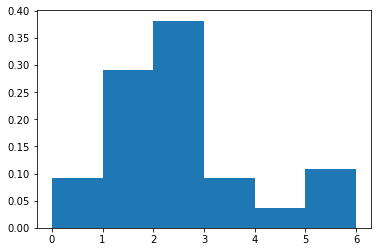

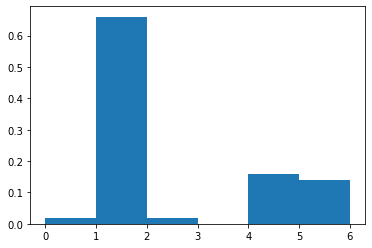

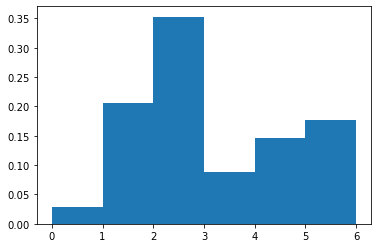

In [229]:
b = np.linspace(0, c_jumps, c_jumps+1)
for k in man_labels:
    plt.hist([v for v in man_labels[k].values()], b, density=True)
    plt.show()

# Check stats

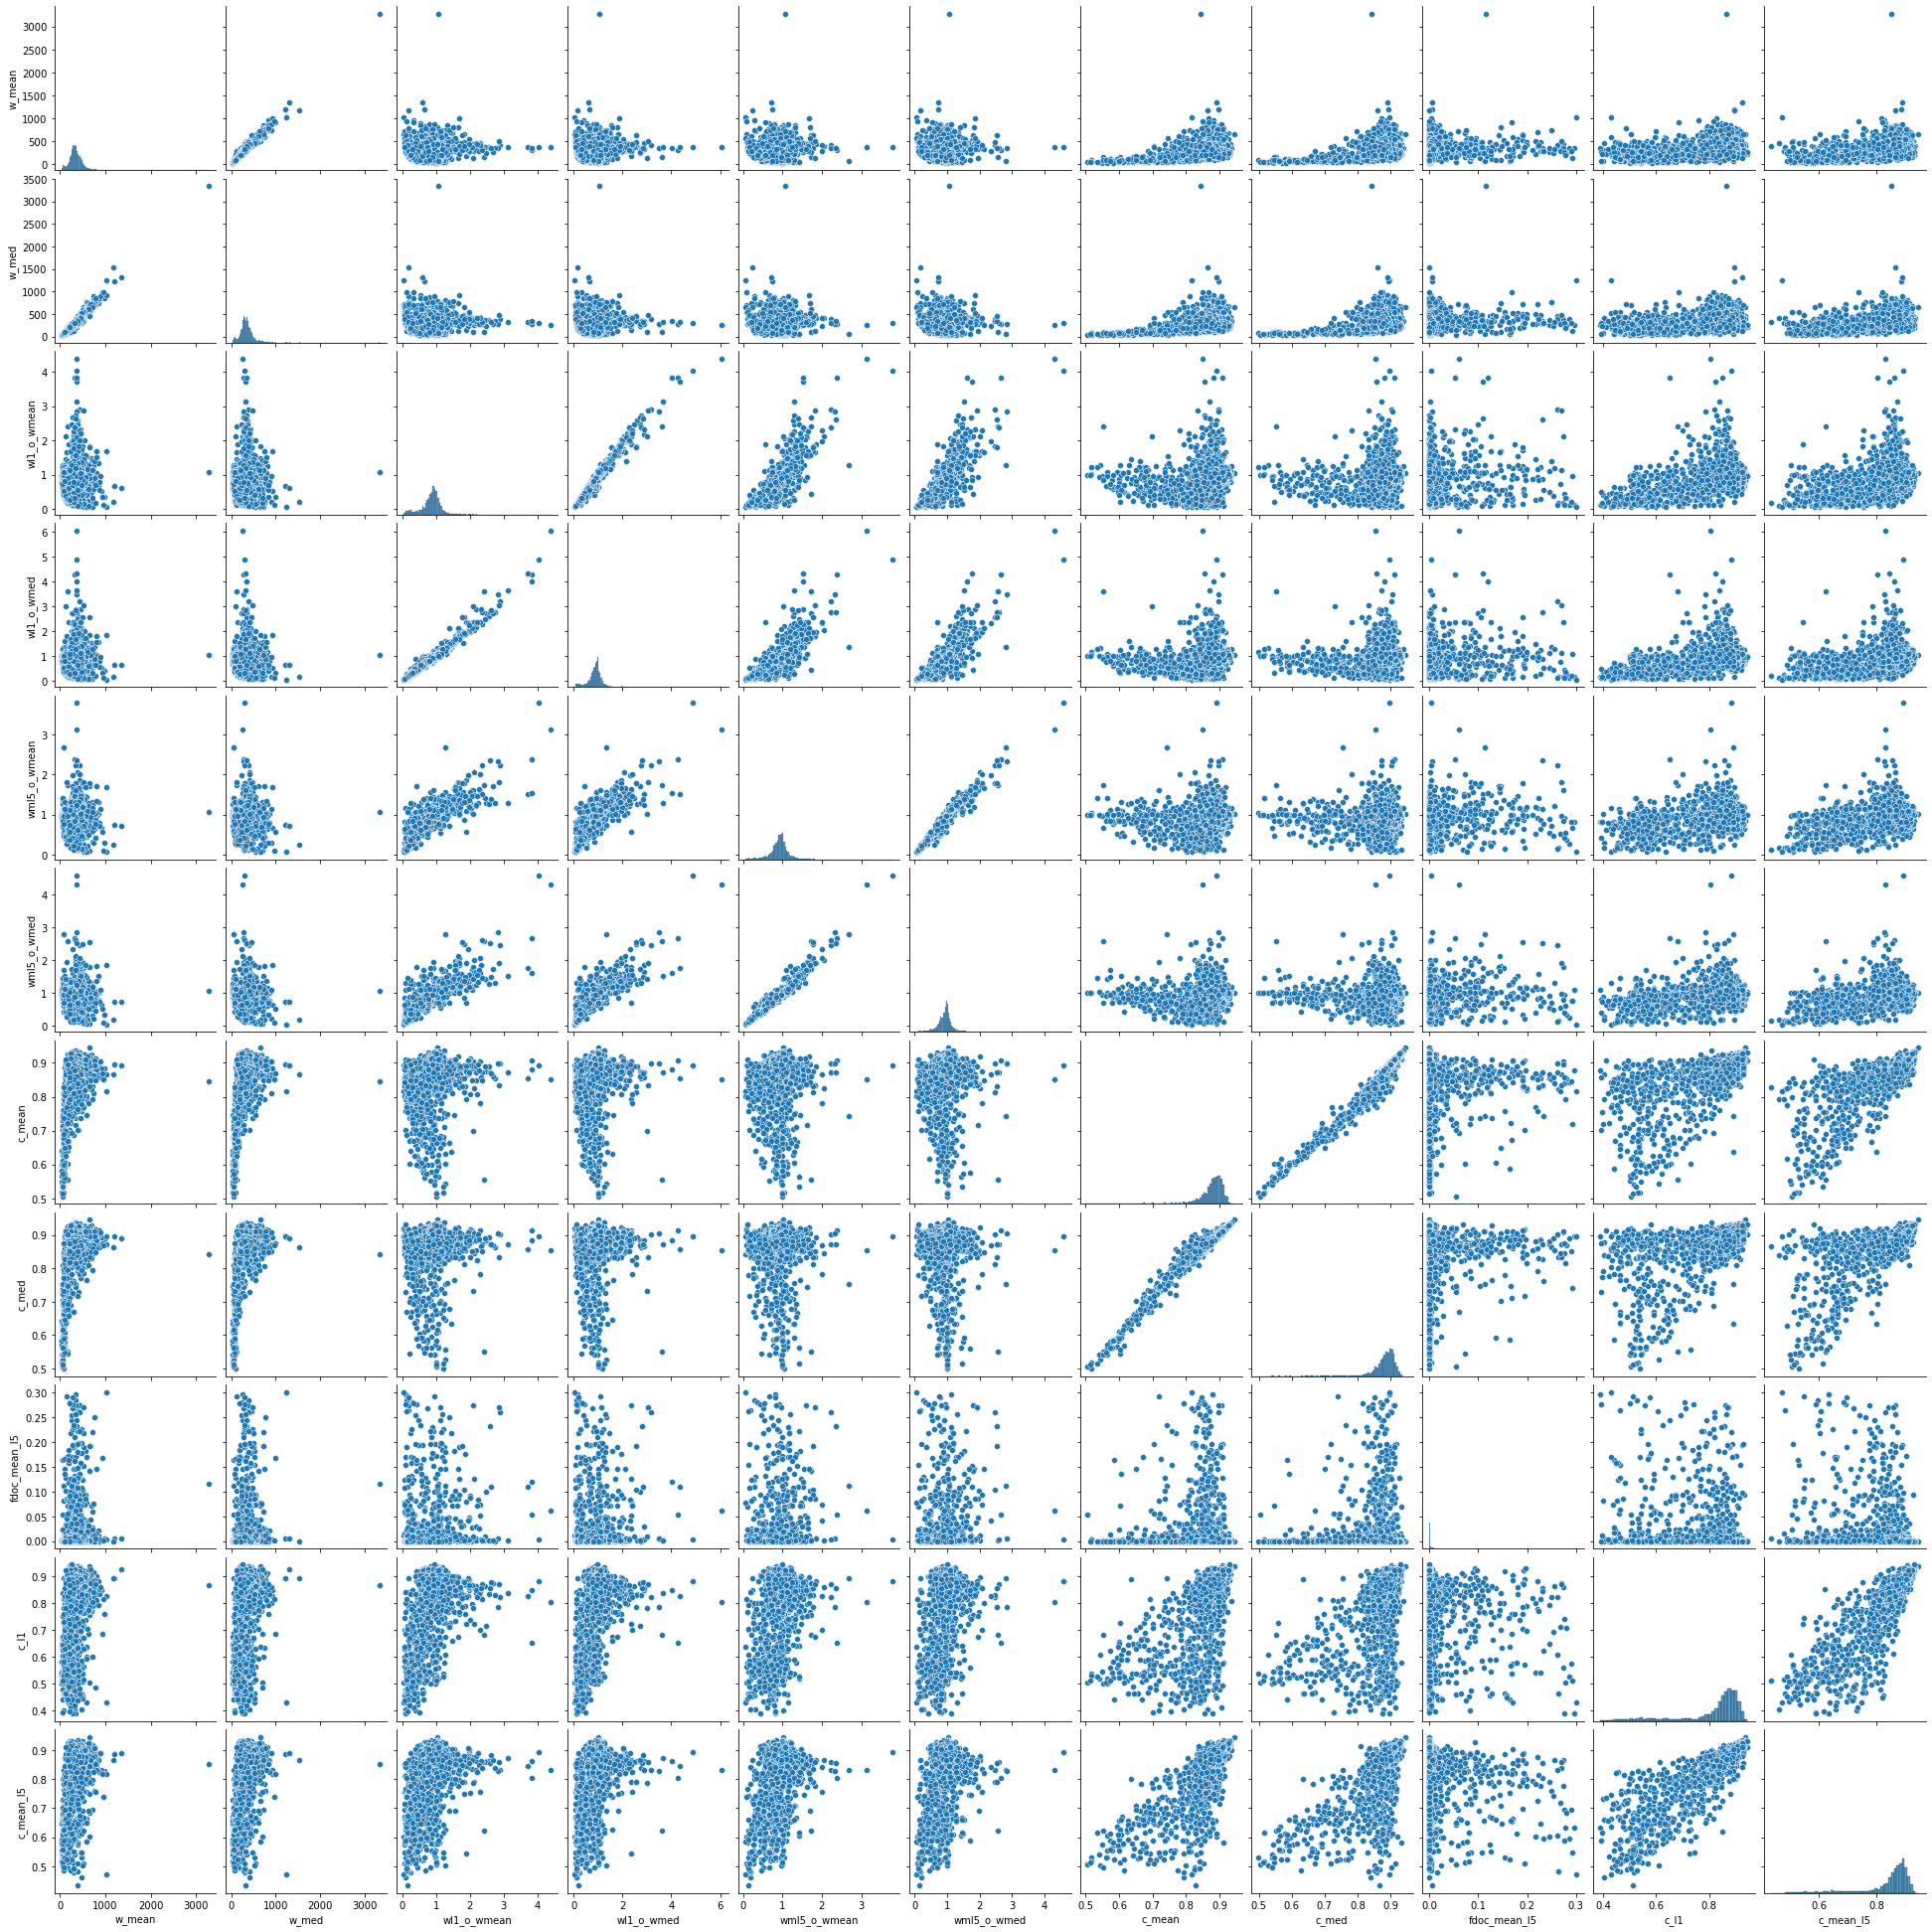

In [232]:
sns.pairplot(stopped_tracks_df.drop(columns=['idx_0', 'idx_1']))

# Check embeddings

In [233]:
# normalize
norm_m = vectorized.mean(axis=0, keepdims=True)
norm_s = vectorized.std(axis=0, keepdims=True)
vectorized_n = (vectorized-norm_m)/norm_s

In [234]:
#save_pckl(stopped_tracks_g, 'grouped_stopped_tracks.pckl')

In [235]:
def get_emb(data, densmap=True, nd_emb=2):
    um = umap.UMAP(n_components=nd_emb, output_dens=True, n_neighbors=50, densmap=True)

    v = data.reshape((len(data), -1))
    v_emb, r_orig, r_emb = um.fit_transform(v)
    
    return v_emb, r_orig, r_emb

In [236]:
def plot_emb(data_emb, gt, title=None):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    x, y = data_emb.T
    p0 = ax[0].scatter(x,y,c=gt, s=7, cmap='nipy_spectral')
    
    gt = np.array(gt)
    mask = gt != c_unknown
    x_m = x[mask]
    y_m = y[mask]
    gt_m = gt[mask]
    p1 = ax[1].scatter(x_m,y_m,c=gt_m,s=30, cmap='nipy_spectral')
    ax[1].set_xlim(ax[0].get_xlim())
    ax[1].set_ylim(ax[0].get_ylim())
    
    plt.colorbar(p0, ax=ax[0], label=r'gt')
    plt.colorbar(p1, ax=ax[1], label=r'known')
    plt.tight_layout(pad=2, h_pad=1, w_pad=0)
    if title:
        plt.suptitle(title)

In [237]:
# get and plot density based embeddings
data_emb, r_orig, r_emb = get_emb(vectorized_n, densmap=True)

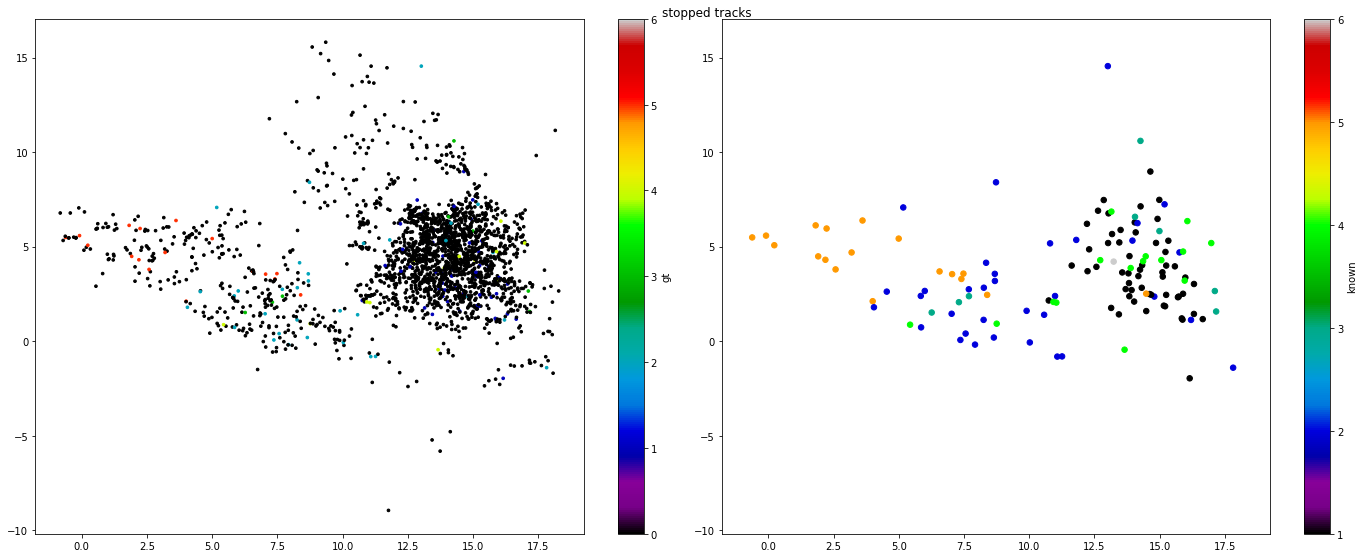

In [238]:
plot_emb(data_emb, gt=classes, title='stopped tracks')
plt.show()

In [239]:
# get and plot Normal embeddings
data_emb, r_orig, r_emb = get_emb(vectorized_n, densmap=False)

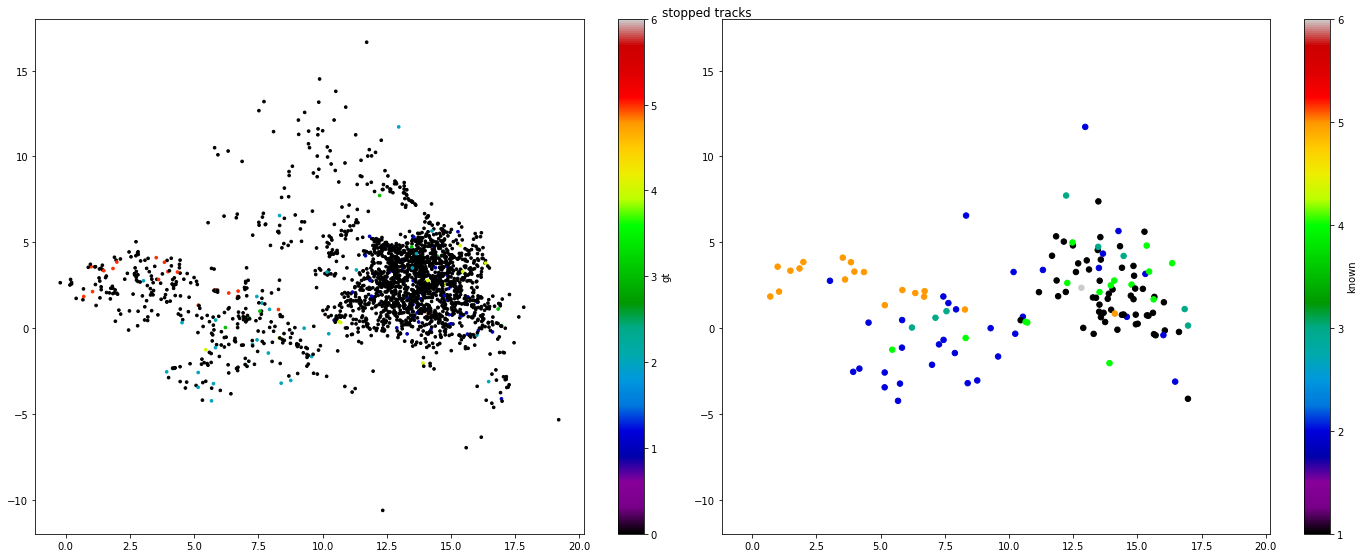

In [240]:
plot_emb(data_emb, gt=classes, title='stopped tracks')
plt.show()

# not a cell detection

## inspection

In [504]:
# get and plot Normal embeddings
nac_data_emb, r_orig, r_emb = get_emb(vectorized_n[:, :2], densmap=False)

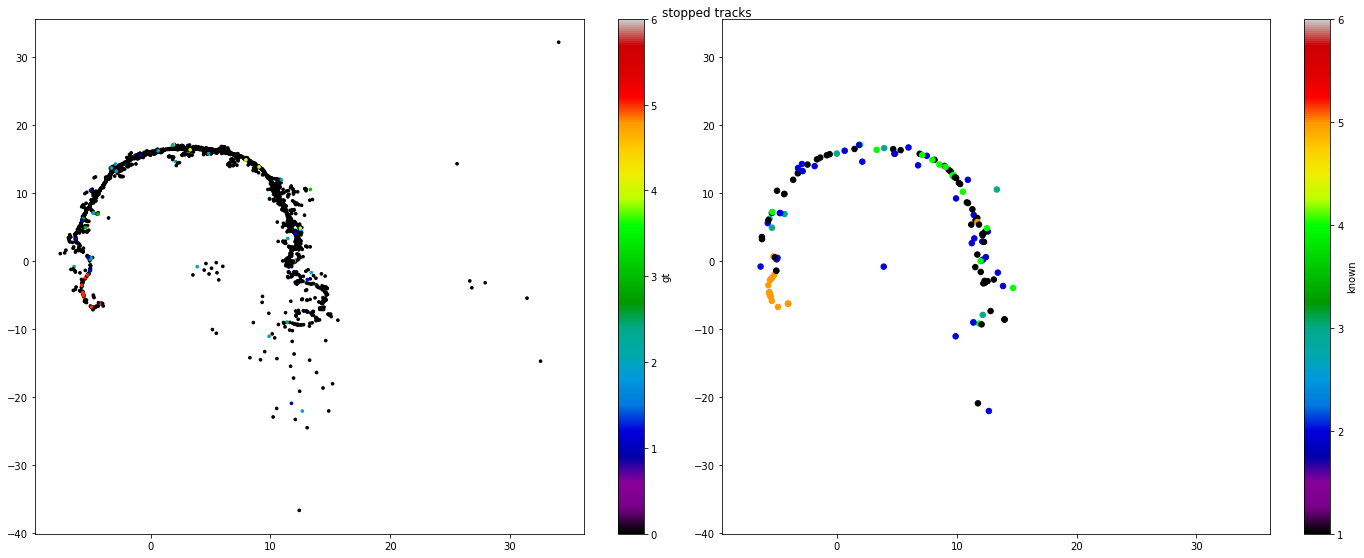

In [505]:
plot_emb(nac_data_emb, gt=classes, title='stopped tracks')
plt.show()

In [506]:
# annotate not a cell group:
#not_a_cell = np.array([1*(x<0 and y<-3) for x, y in nac_data_emb])

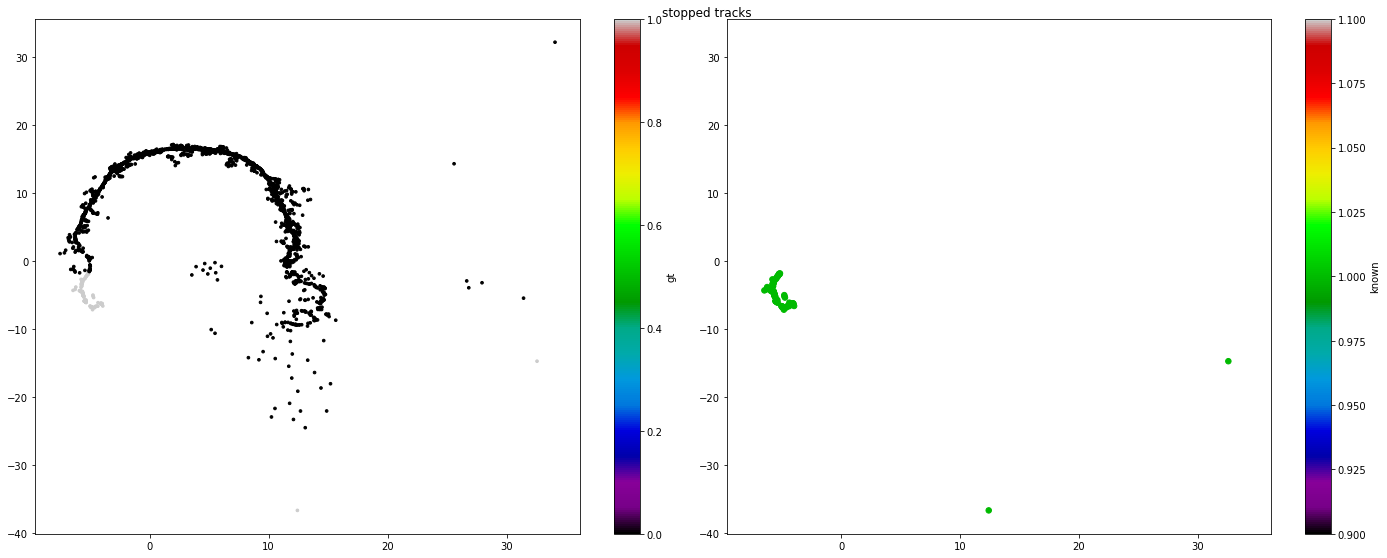

In [507]:
plot_emb(nac_data_emb, gt=not_a_cell, title='stopped tracks')
plt.show()

In [255]:
#save_pckl(not_a_cell, 'not_a_cell_umap_labels.pckl')

### train on labelled

In [13]:
(classes==c_not_cell).sum()

18

In [482]:
# train
classes = np.array(classes)
mask_known = classes != c_unknown

w_mean_w_med = vectorized[:, :2]
X = w_mean_w_med[mask_known]
y = classes[mask_known]
y = (y==c_not_cell).astype(np.int32)

c = Classificator()
c.train(X, y, test_size=0.2)

In [483]:
print(c)

Classificator based on <class 'sklearn.linear_model._logistic.LogisticRegression'>,
	 t/v 105/27 samples.
	 Accuracy 0.962 / 0.963


In [493]:
# c.save('not_a_cell_classifier.lrp')

### inspect trained on labels

In [510]:
notacell_cl = Classificator.load('not_a_cell_classifier.lrp')

In [511]:
not_a_cell_pred = notacell_cl.predict(w_mean_w_med)

In [512]:
not_a_cell_pred_p = notacell_cl.predict_proba(w_mean_w_med)

In [513]:
detached_pred_p.shape

(2229, 2)

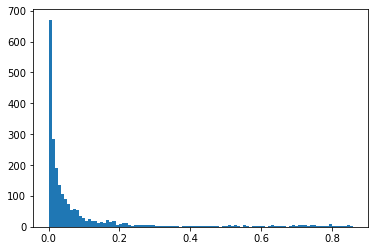

In [514]:
plt.hist(not_a_cell_pred_p[:, 1], 100); # probability of being dettached

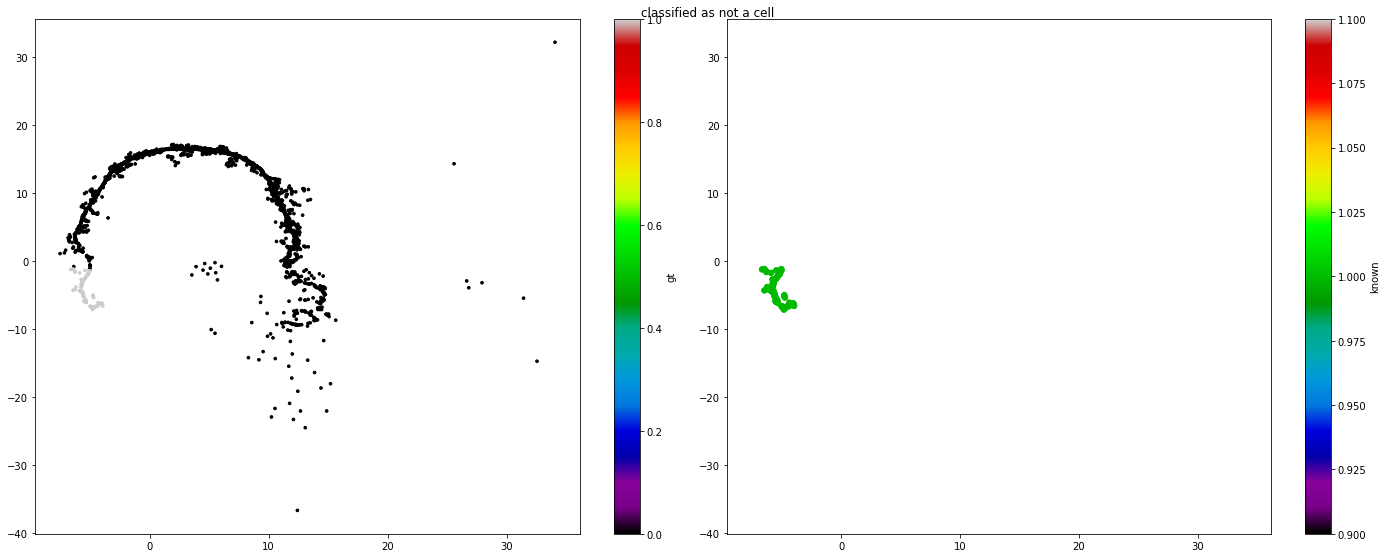

In [518]:
# not a cell
plot_emb(nac_data_emb, gt=not_a_cell_pred, title='stopped tracks')
plt.suptitle('classified as not a cell');
plt.show()

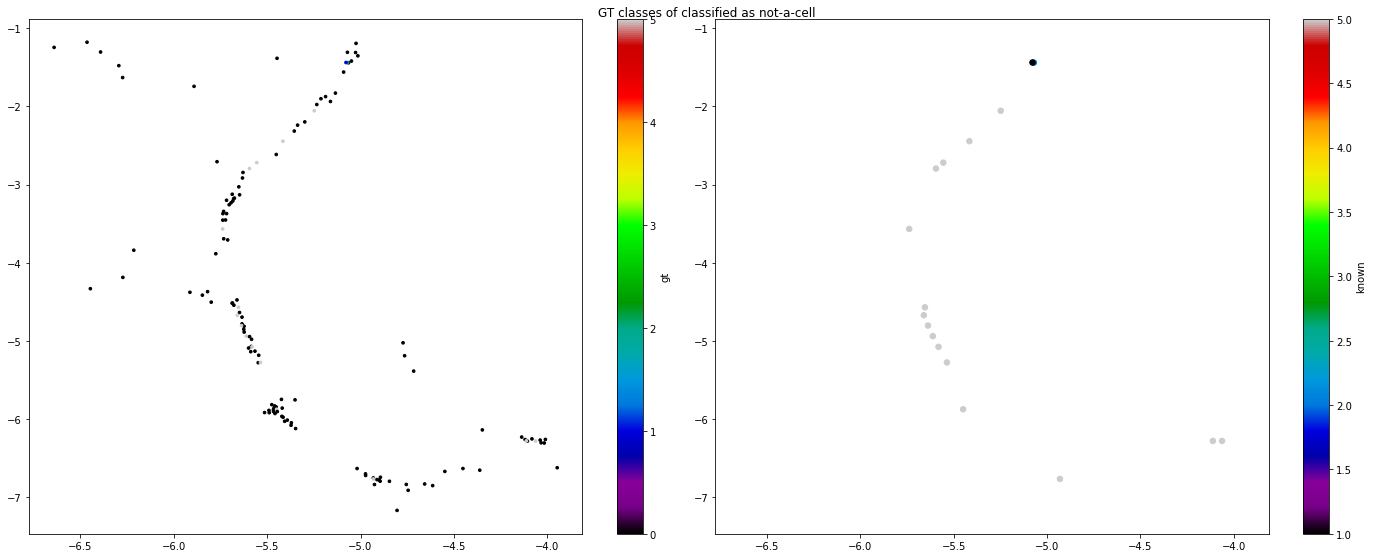

In [521]:
# gt classes of classified as NaC
mask_nac = not_a_cell_pred.astype(bool)
plot_emb(nac_data_emb[mask_nac], gt=classes[mask_nac], title='stopped tracks')
plt.suptitle('GT classes of classified as not-a-cell');
plt.show()

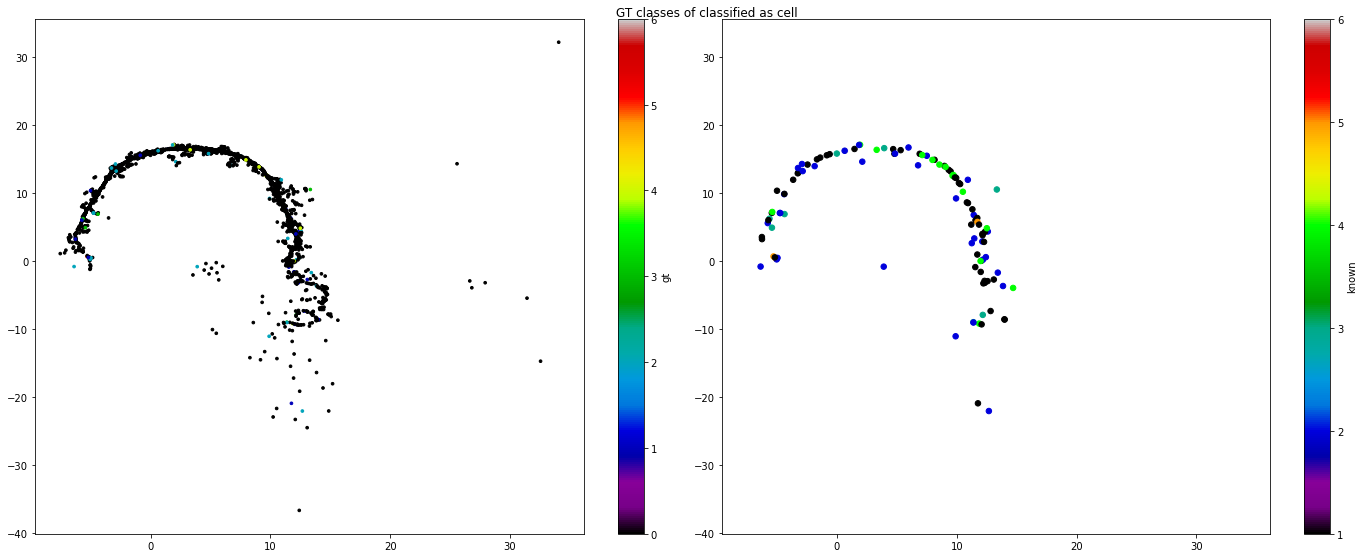

In [522]:
# gt classes of classified as NaC
mask_nac = not_a_cell_pred.astype(bool)
plot_emb(nac_data_emb[~mask_nac], gt=classes[~mask_nac], title='stopped tracks')
plt.suptitle('GT classes of classified as cell');
plt.show()

### train on umap region as label

In [525]:
# train
classes = np.array(classes)

w_mean_w_med = vectorized[:, :2]
X = w_mean_w_med
y = not_a_cell

c = Classificator()
c.train(X, y, test_size=0.2)

In [526]:
print(c)

Classificator based on <class 'sklearn.linear_model._logistic.LogisticRegression'>,
	 t/v 1783/446 samples.
	 Accuracy 0.998 / 0.996


In [527]:
c.save('not_a_cell_region_classifier.lrp')

### inspect trained on labels

In [529]:
notacell_reg_cl = Classificator.load('not_a_cell_region_classifier.lrp')

In [530]:
not_a_cell_reg_pred = notacell_reg_cl.predict(w_mean_w_med)

In [531]:
not_a_cell_reg_pred_p = notacell_reg_cl.predict_proba(w_mean_w_med)

In [532]:
not_a_cell_reg_pred_p.shape

(2229, 2)

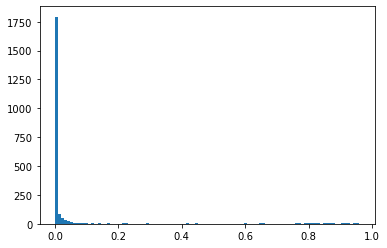

In [533]:
plt.hist(not_a_cell_reg_pred_p[:, 1], 100); # probability of being dettached

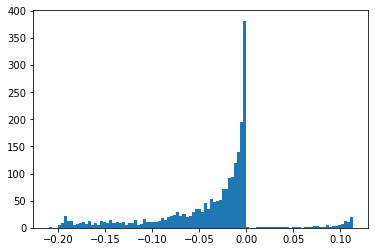

In [536]:
plt.hist((not_a_cell_reg_pred_p-not_a_cell_pred_p)[:, 1], 100); # probability of being dettached

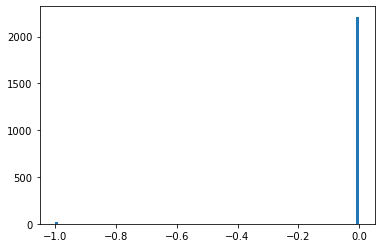

In [537]:
plt.hist(not_a_cell_reg_pred - not_a_cell_pred, 100); # probability of being dettached

In [538]:
print(sum(not_a_cell_reg_pred != not_a_cell_pred) / len(not_a_cell_reg_pred))

0.00762673844773441


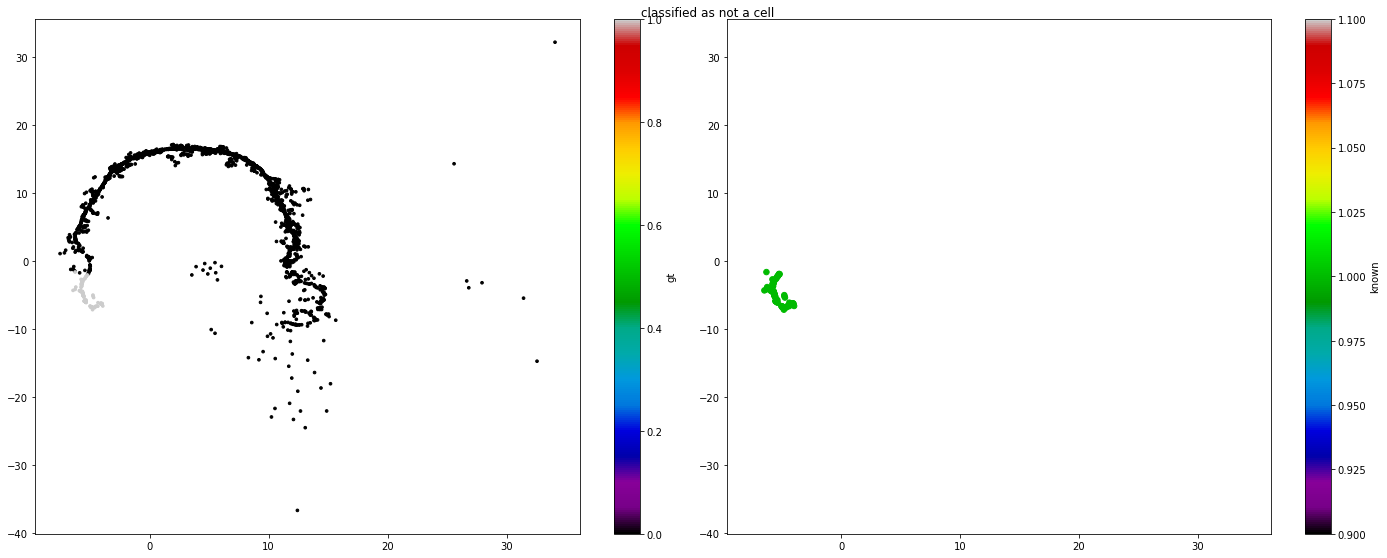

In [540]:
# not a cell
plot_emb(nac_data_emb, gt=not_a_cell_reg_pred, title='stopped tracks')
plt.suptitle('classified as not a cell');
plt.show()

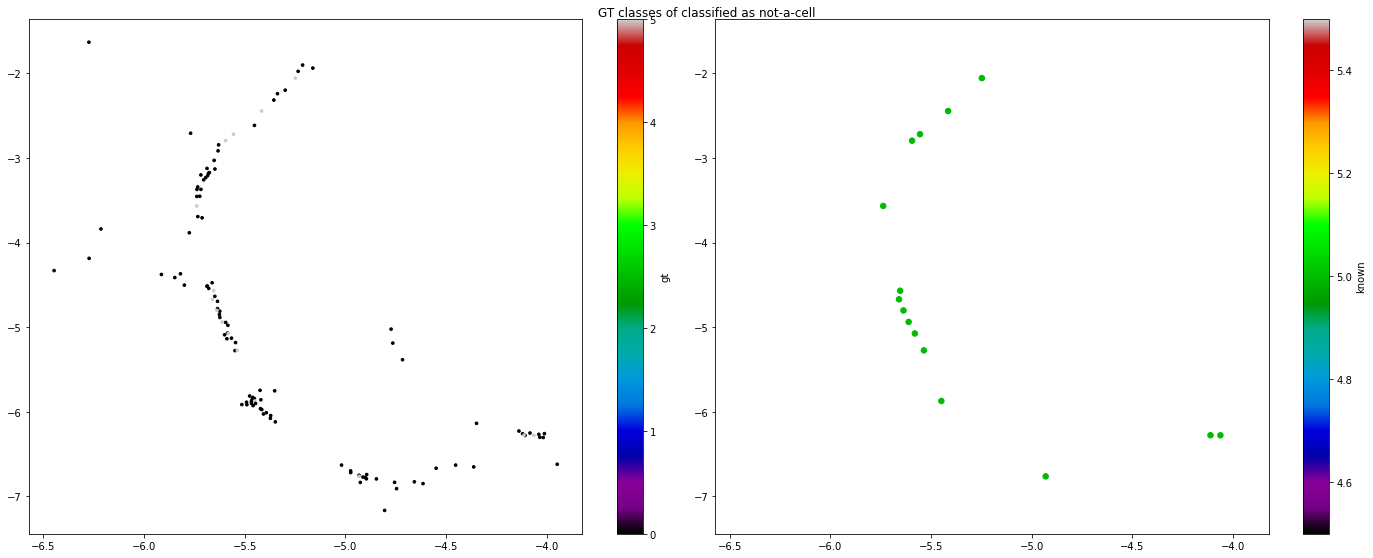

In [541]:
# gt classes of classified as NaC
mask_nac = not_a_cell_reg_pred.astype(bool)
plot_emb(nac_data_emb[mask_nac], gt=classes[mask_nac], title='stopped tracks')
plt.suptitle('GT classes of classified as not-a-cell');
plt.show()

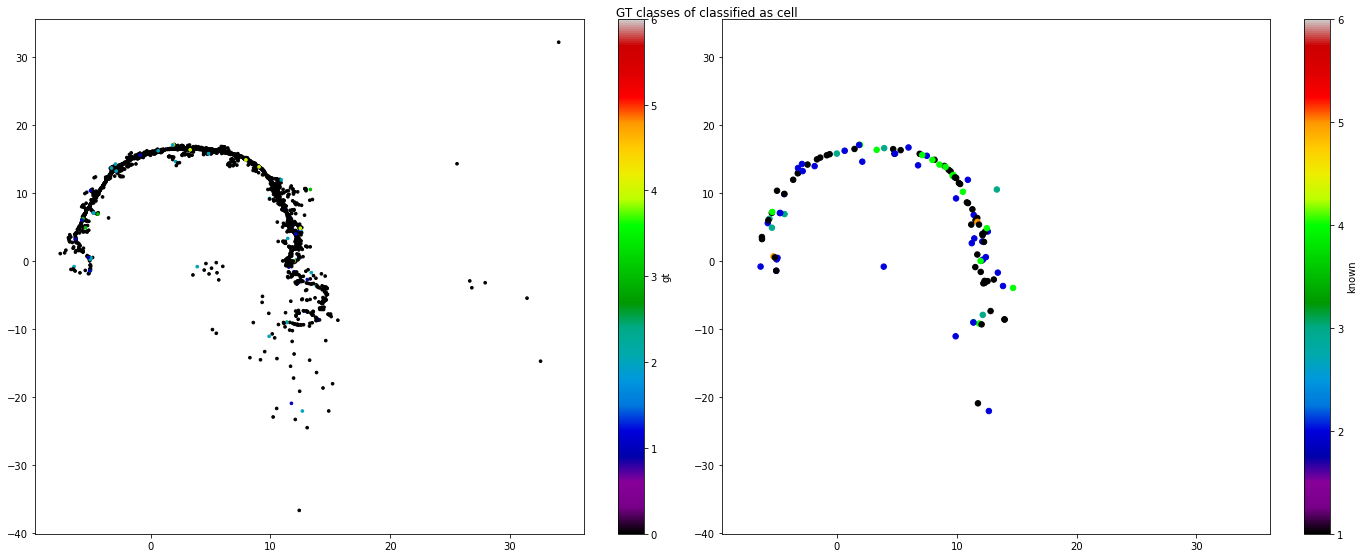

In [542]:
# gt classes of classified as NaC
mask_nac = not_a_cell_reg_pred.astype(bool)
plot_emb(nac_data_emb[~mask_nac], gt=classes[~mask_nac], title='stopped tracks')
plt.suptitle('GT classes of classified as cell');
plt.show()

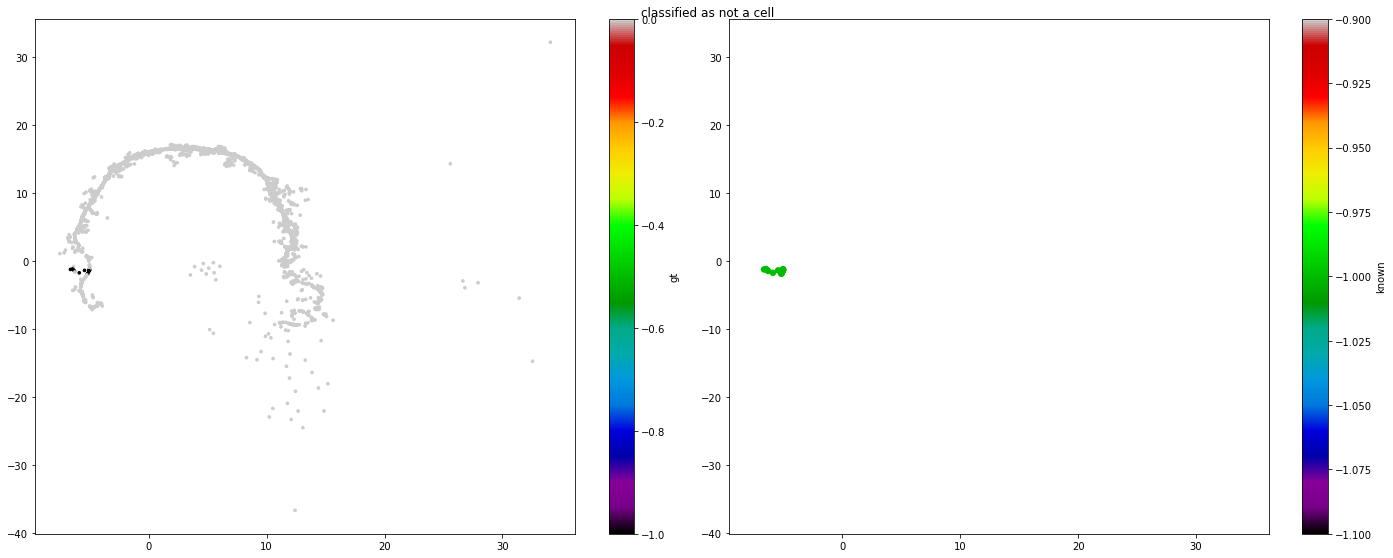

In [543]:
# difference between two predictors
plot_emb(nac_data_emb, gt=not_a_cell_reg_pred-not_a_cell_pred, title='stopped tracks')
plt.suptitle('classified as not a cell');
plt.show()

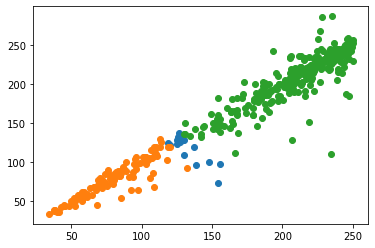

In [550]:
#difference inspection
w1, w2 = w_mean_w_med[(not_a_cell_reg_pred-not_a_cell_pred).astype(bool)].T
plt.scatter(w1, w2)

w1, w2 = w_mean_w_med[(not_a_cell_reg_pred).astype(bool)].T
plt.scatter(w1, w2)

w1, w2 = w_mean_w_med[~(not_a_cell_pred).astype(bool)].T
_m = w1<250
w1, w2 = w1[_m], w2[_m]
plt.scatter(w1, w2)

since the two lead to comparable results the one from manual labels will be used

# detached vs diap detection

## inspection of distributions

In [256]:
cell_mask = ~not_a_cell.astype(bool)
vectorized_n_cells = vectorized_n[cell_mask]
classes_cells = np.array(classes)[cell_mask]

In [257]:
# get and plot Normal embeddings
data_emb, r_orig, r_emb = get_emb(vectorized_n_cells, densmap=False)

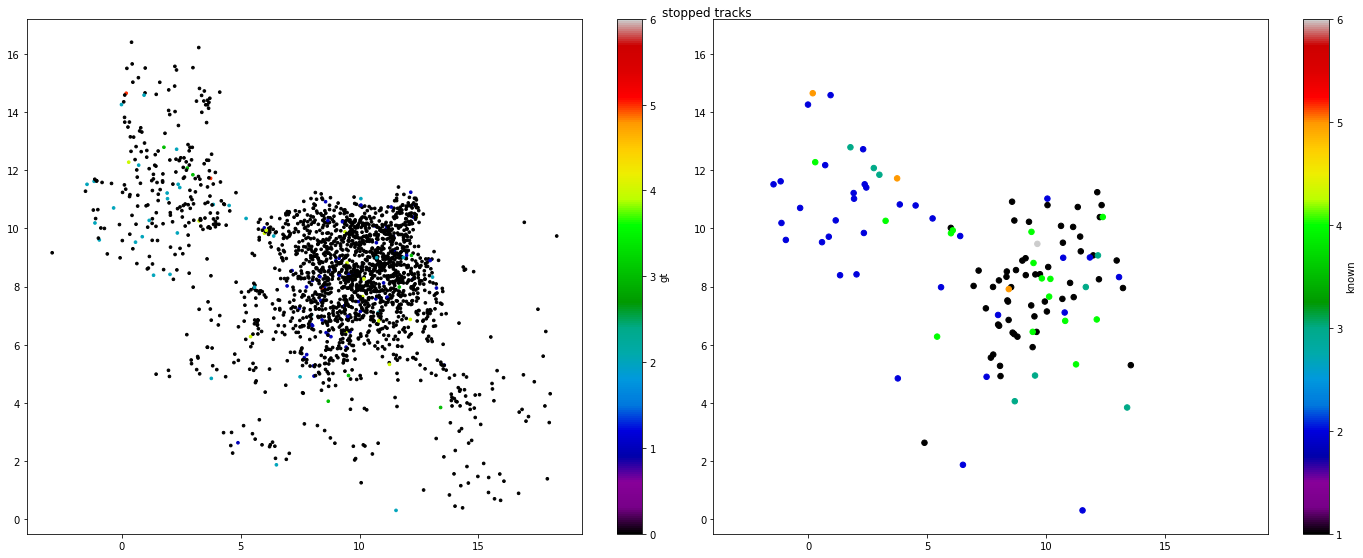

In [258]:
plot_emb(data_emb, gt=classes_cells, title='stopped tracks')
plt.show()

In [261]:
# annotate not a cell group:
x0 = 5
y0 = 2
x1 = 15
y1 = 8.5

detached = np.array([(y-y0)*(x1-x0)>(x-x0)*(y1-y0) for x, y in data_emb])*np.array([(x>7) for x, y in data_emb])
            

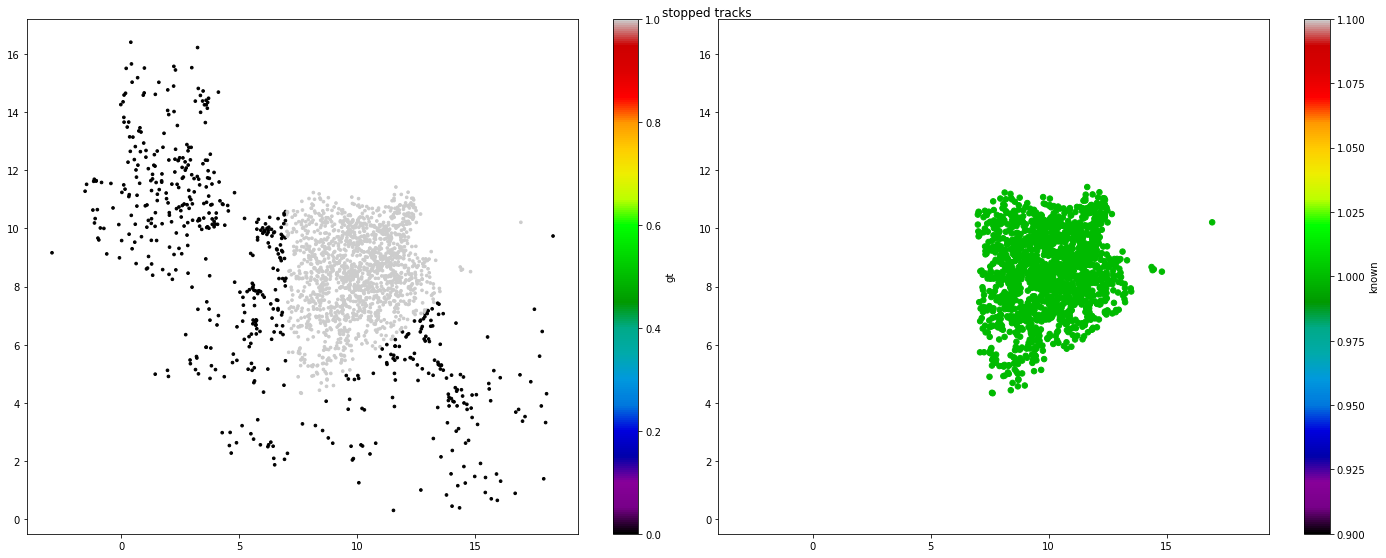

In [262]:
plot_emb(data_emb, gt=detached, title='stopped tracks')
plt.show()

## Classificator

### train

In [461]:
# train
classes = np.array(classes)
mask_known = classes != c_unknown

X = vectorized[mask_known]
y = classes[mask_known]
y = (y==c_det).astype(np.int32)

c = Classificator()
c.train(X, y, test_size=0.2)

In [462]:
c._norm

(array([[3.46354200e+02, 3.42465909e+02, 7.39191990e-01, 7.56766951e-01,
         8.32360246e-01, 8.49617355e-01, 8.48951618e-01, 8.60488711e-01,
         1.46870206e-02, 7.61938827e-01, 7.98239408e-01]]),
 array([[1.65990042e+02, 1.67458251e+02, 3.60876790e-01, 4.25270684e-01,
         2.74099528e-01, 3.15758921e-01, 8.29116176e-02, 8.05281919e-02,
         4.35586804e-02, 1.51447320e-01, 1.24461367e-01]]))

In [463]:
print(c)

Classificator based on <class 'sklearn.linear_model._logistic.LogisticRegression'>,
	 t/v 105/27 samples.
	 Accuracy 0.800 / 0.852


In [464]:
# c.save('detached_classifier.lrp')

### inspect trained

In [484]:
detachment_cl = Classificator.load('detached_classifier.lrp')

In [485]:
detached_pred = detachment_cl.predict(vectorized)

In [486]:
detached_pred_p = detachment_cl.predict_proba(vectorized)

In [487]:
detached_pred_p.shape

(2229, 2)

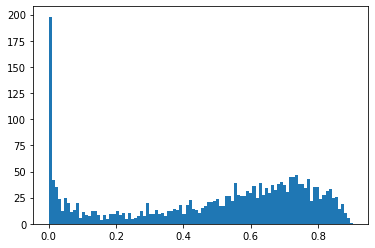

In [488]:
plt.hist(detached_pred_p[:, 1], 100); # probability of being dettached

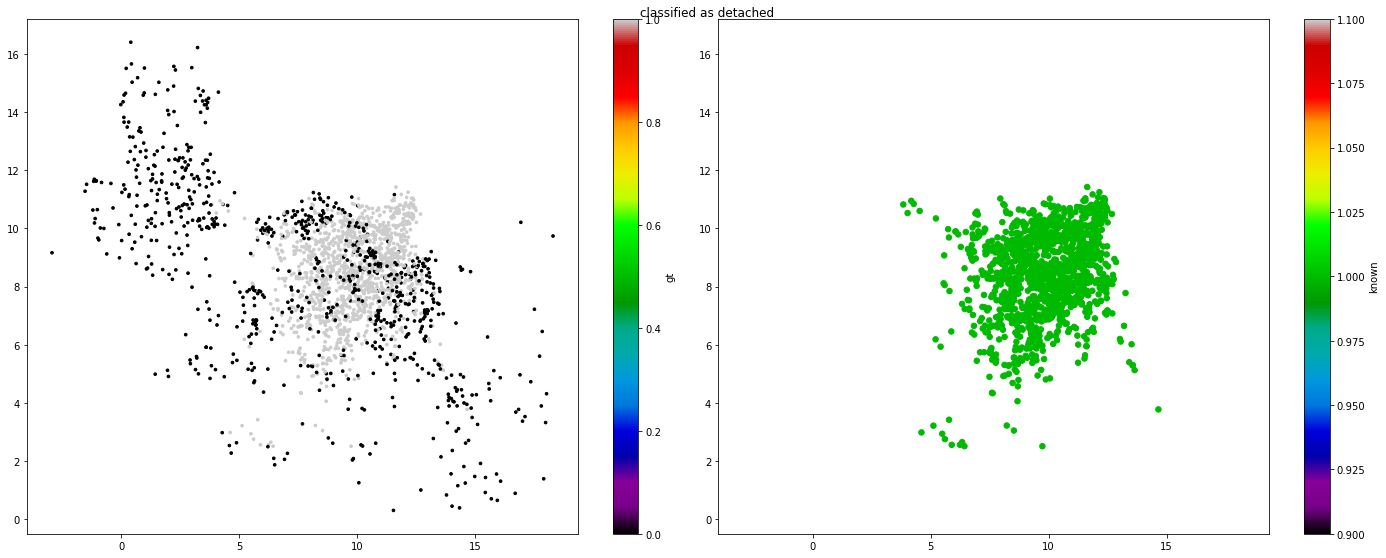

In [489]:
#detached
plot_emb(data_emb, gt=detached_pred[cell_mask], title='stopped tracks')
plt.suptitle('classified as detached');
plt.show()

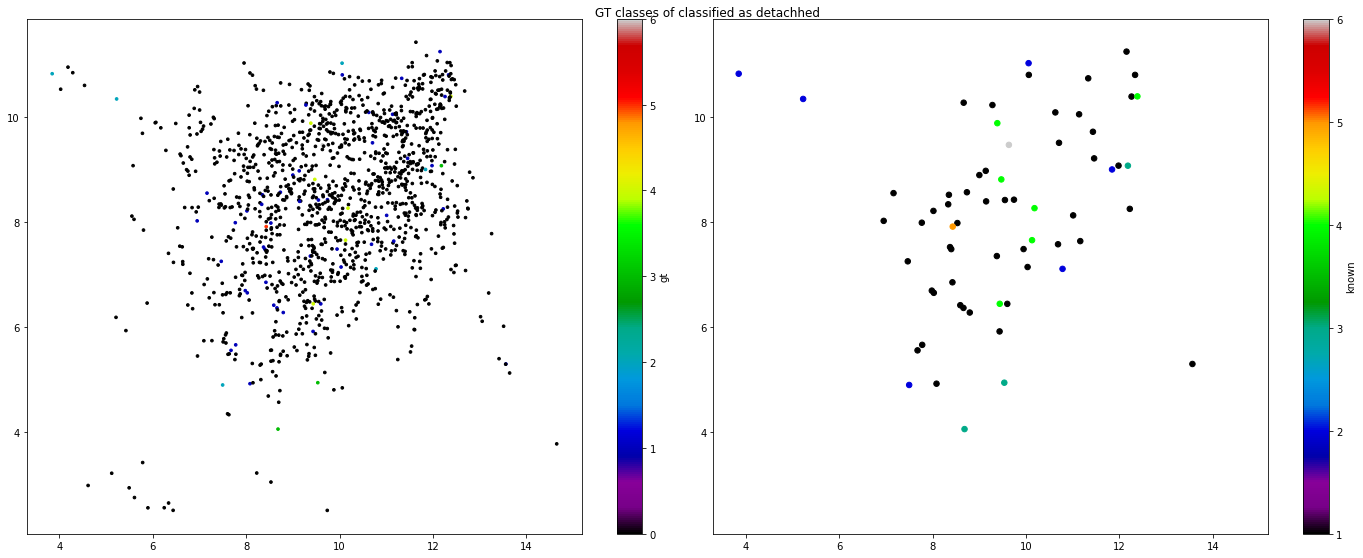

In [490]:
# gt classes of classified as detachhed
mask_det = detached_pred[cell_mask].astype(bool)
plot_emb(data_emb[mask_det], gt=classes_cells[mask_det], title='stopped tracks')
plt.suptitle('GT classes of classified as detachhed');
plt.show()

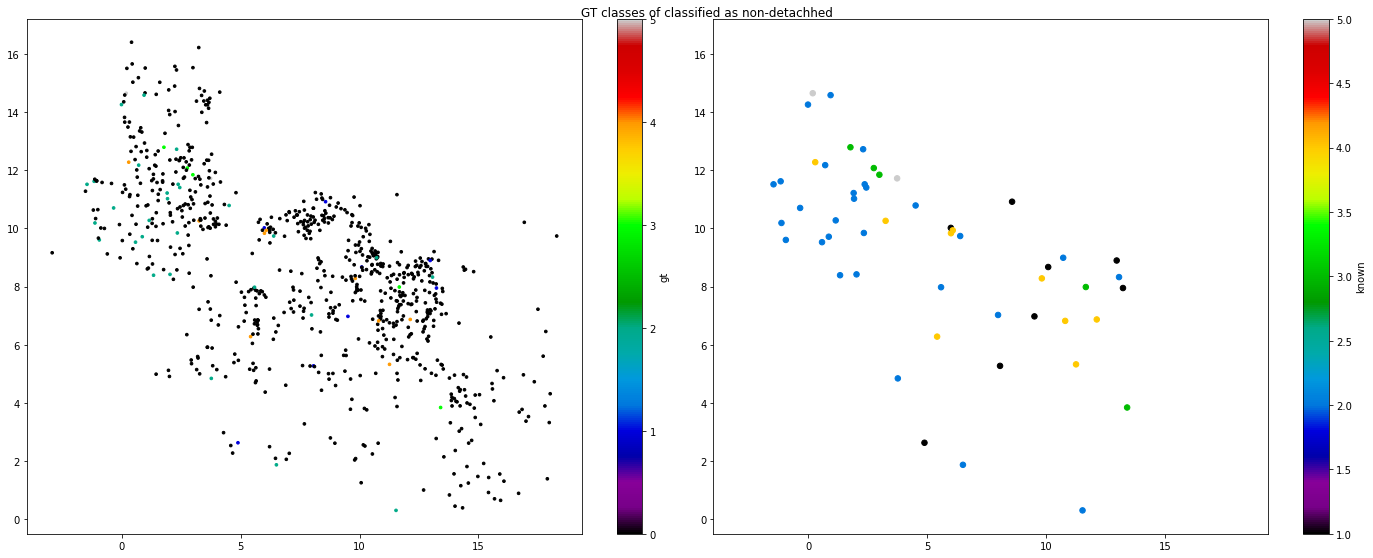

In [491]:
# GT classes of classified as non-detachhed
mask_det = detached_pred[cell_mask].astype(bool)
plot_emb(data_emb[~mask_det], gt=classes_cells[~mask_det], title='stopped tracks')
plt.suptitle('GT classes of classified as non-detachhed');
plt.show()